In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [66]:
df = pd.read_csv('multiple_choice_responses.csv')

In [3]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,...,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,Select any activities that make up an importan...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55-59,Female,Germany,Professional degree,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN


In [4]:
row_1=df.iloc[0][15]
row_1

'What is your current yearly compensation (approximate $USD)?'

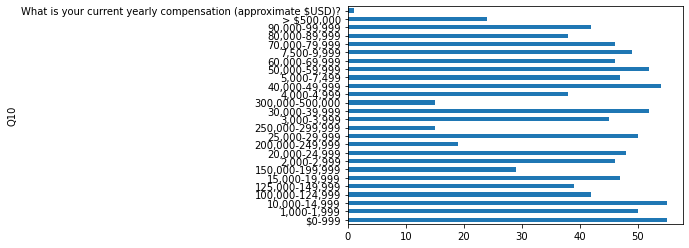

In [5]:
df.groupby('Q10')['Q3'].nunique().plot(kind='barh')
plt.show()

In [6]:
df['Q3'].value_counts()

India                                                   4786
United States of America                                3085
Other                                                   1054
Brazil                                                   728
Japan                                                    673
Russia                                                   626
China                                                    574
Germany                                                  531
United Kingdom of Great Britain and Northern Ireland     482
Canada                                                   450
Spain                                                    399
Nigeria                                                  395
France                                                   387
Taiwan                                                   301
Turkey                                                   288
Italy                                                    271
Australia               

In [67]:
#only resposes from United States
df = df[df['Q3'] == 'United States of America']

#only responses with salary
df = df.dropna(subset=['Q10'])

#drop Q7 due to formatting issues
df.drop(['Q7'], axis=1, inplace=True)
print(df.shape)
df.head()

(2134, 136)


,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,...,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11
8,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees","We recently started using ML methods (i.e., mo...",Analyze and understand data to influence produ...,NaN,Build prototypes to explore applying machine l...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,30-34,Male,United States of America,Master’s degree,Product/Project Manager,"> 10,000 employees",I do not know,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,50-54,Female,United States of America,Master’s degree,Data Analyst,50-249 employees,We use ML methods for generating insights (but...,Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,NaN,...,NaN,NaN,Microsoft SQL Server,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,35-39,Male,United States of America,Bachelor’s degree,Other,250-999 employees,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,30-34,Female,United States of America,Master’s degree,Research Scientist,"> 10,000 employees","We recently started using ML methods (i.e., mo...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,...,NaN,NaN,Microsoft SQL Server,NaN,Microsoft Access,AWS Relational Database Service,NaN,Azure SQL Database,Google Cloud SQL,NaN


In [68]:
df['Q10'].value_counts()

100,000-124,999    370
150,000-199,999    332
125,000-149,999    316
90,000-99,999      148
80,000-89,999      144
70,000-79,999      141
200,000-249,999    122
60,000-69,999       98
$0-999              89
50,000-59,999       81
300,000-500,000     52
40,000-49,999       48
250,000-299,999     42
30,000-39,999       32
> $500,000          26
25,000-29,999       16
15,000-19,999       16
20,000-24,999       15
10,000-14,999       14
5,000-7,499          9
7,500-9,999          7
1,000-1,999          6
2,000-2,999          4
3,000-3,999          4
4,000-4,999          2
Name: Q10, dtype: int64

In [69]:
#remove any salaries under $15,000 (minimum wage for full-time)
drop_salaries = ['$0-999','1,000-1,999','2,000-2,999','3,000-3,999','4,000-4,999','5,000-7,499','7,500-9,999','10,000-14,999']
df = df[~df['Q10'].isin(drop_salaries)]

print(df.shape)
df['Q10'].value_counts()

(1999, 136)


100,000-124,999    370
150,000-199,999    332
125,000-149,999    316
90,000-99,999      148
80,000-89,999      144
70,000-79,999      141
200,000-249,999    122
60,000-69,999       98
50,000-59,999       81
300,000-500,000     52
40,000-49,999       48
250,000-299,999     42
30,000-39,999       32
> $500,000          26
25,000-29,999       16
15,000-19,999       16
20,000-24,999       15
Name: Q10, dtype: int64

In [70]:
df = df.reset_index()

In [124]:
temp = df.copy()

In [116]:
# temp2['Q10'][42]
temp.iloc[[42]]
# df[df['low']=='> $500,000']
# temp.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q9_Part_1,Q9_Part_2,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,low,high
42,284,40-44,Male,United States of America,Master’s degree,Data Scientist,"> 10,000 employees","We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,...,NaN,Oracle Database,NaN,NaN,NaN,Azure SQL Database,Google Cloud SQL,NaN,500001,500001


In [125]:
#replace characters in compensation column
temp['Q10']=temp['Q10'].str.replace(',','')
temp['Q10']=temp['Q10'].str.replace('> ','')
temp['Q10']=temp['Q10'].str.replace('$','')
temp['Q10']=temp['Q10'].str.replace(' ','')
temp['Q10']=temp['Q10'].str.replace('500000','500001-500001')

#split compensation range by - into low and high
new = temp['Q10'].str.split("-", n = 1, expand = True)

# making separate low range column 
temp['low'] = new[0].astype('int')
  
# making separate high range column 
temp['high'] = new[1]
temp['high'] = temp['high'].str.replace('500001-500001','500000')
temp['high'] = temp['high'].astype('int')

#create mean column
temp['mean_salary'] = (temp['low'] + temp['high']) / 2
temp['mean_salary'] = temp['mean_salary'].round()
temp.head()


,index,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q9_Part_1,Q9_Part_2,...,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,low,high,mean_salary
0,8,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees","We recently started using ML methods (i.e., mo...",Analyze and understand data to influence produ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80000,89999,85000.0
1,14,30-34,Male,United States of America,Master’s degree,Product/Project Manager,"> 10,000 employees",I do not know,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90000,99999,95000.0
2,16,50-54,Female,United States of America,Master’s degree,Data Analyst,50-249 employees,We use ML methods for generating insights (but...,Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125000,149999,137500.0
3,22,35-39,Male,United States of America,Bachelor’s degree,Other,250-999 employees,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125000,149999,137500.0
4,34,30-34,Female,United States of America,Master’s degree,Research Scientist,"> 10,000 employees","We recently started using ML methods (i.e., mo...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,...,NaN,Microsoft Access,AWS Relational Database Service,NaN,Azure SQL Database,Google Cloud SQL,NaN,150000,199999,175000.0


In [147]:
# import random

# np.random.seed(42)
# # temp['rand_salary'] = np.random.randint(temp['low'],temp['high'], size = 10)
# # temp['rand_salary'] = np.random.randint(temp['low'], temp['high'])
# temp['rand_salary'] = (random.randint(0,2000) % (temp['high'] + 1 - temp['low'])) + temp['low']
# temp['plus'] = temp['high'] + temp['low']


# temp.head()

temp.drop(columns=['rand_salary', 'rand_salary2', 'plus','Q18_Part_12'])
print(temp.shape)
temp.head()

(1999, 143)


,index,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q9_Part_1,Q9_Part_2,...,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,low,high,mean_salary,rand_salary,rand_salary2,plus
0,8,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees","We recently started using ML methods (i.e., mo...",Analyze and understand data to influence produ...,NaN,...,NaN,NaN,NaN,NaN,80000,89999,85000.0,81272,0 80102 1 90102 2 125102 3...,169999
1,14,30-34,Male,United States of America,Master’s degree,Product/Project Manager,"> 10,000 employees",I do not know,NaN,NaN,...,NaN,NaN,NaN,NaN,90000,99999,95000.0,91272,0 80122 1 90122 2 125122 3...,189999
2,16,50-54,Female,United States of America,Master’s degree,Data Analyst,50-249 employees,We use ML methods for generating insights (but...,Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,...,NaN,NaN,NaN,NaN,125000,149999,137500.0,126272,0 81868 1 91868 2 126868 3...,274999
3,22,35-39,Male,United States of America,Bachelor’s degree,Other,250-999 employees,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,NaN,...,NaN,NaN,NaN,NaN,125000,149999,137500.0,126272,0 80850 1 90850 2 125850 3...,274999
4,34,30-34,Female,United States of America,Master’s degree,Research Scientist,"> 10,000 employees","We recently started using ML methods (i.e., mo...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,...,NaN,Azure SQL Database,Google Cloud SQL,NaN,150000,199999,175000.0,151272,0 80330 1 90330 2 125330 3...,349999


In [148]:
temp.to_excel("salary.xlsx") 
temp.to_csv("salary.csv") 